You are using pip version 10.0.1, however version 21.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Audio length: 3.03 seconds


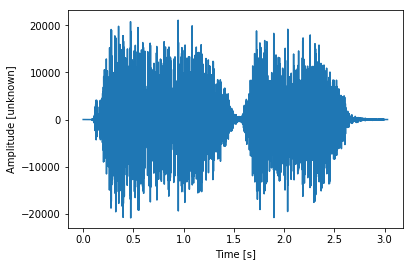

In [1]:
import sys
!{sys.executable} -m pip install scipy
import scipy
from scipy.io import wavfile 
"""
Previously encountered issue with importing scipy on jupyter. 
https://stackoverflow.com/questions/43567876/scipy-cannot-be-imported-in-jupyter-notebook
Got solution from above. 

"""
import numpy as np
import matplotlib.pyplot as plt

rate, audio = wavfile.read('Bronchial Breath Sounds1.wav') 
audio = np.mean(audio, axis=1)
#convert to mono by averaging the left and right channels.
N = audio.shape[0]
L = N / rate

print(f'Audio length: {L:.2f} seconds')

f, ax = plt.subplots()
ax.plot(np.arange(N) / rate, audio)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [unknown]');

In [ ]:
from scipy import fftpack

f_s = 5  # Sampling rate, or number of measurements per second
"""
tried with f_s=100. Computer overheats and still running after 6 minutes
tried with f_s=5. Computer overheats and still running after 8 minutes

https://stackoverflow.com/questions/21161033/strange-numpy-fft-performance
https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.next_fast_len.html
Check these on how to possibly improve the performance 
"""




res = fftpack.fft(audio)
freqs = fftpack.fftfreq(len(audio)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(res))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')

ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)